In [1]:
## basic pymc3 tutorial for coin toss modelling
## next step to try out more complex priors and probabilities

## tuorial url:
## https://towardsdatascience.com/conducting-bayesian-inference-in-python-using-pymc3-d407f8d934a5

In [2]:
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
tosses = [
    1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
    0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
    0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
    1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
    1, 1, 1, 0, 0, 0, 1, 0, 1, 0
]

In [4]:
with pm.Model() as model:
    # define the prior
    theta = pm.Beta('theta', 2, 2)
    
    # define the likelihood
    data = pm.Bernoulli('data', theta, observed=tosses)
    
    # get the samples
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


In [10]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

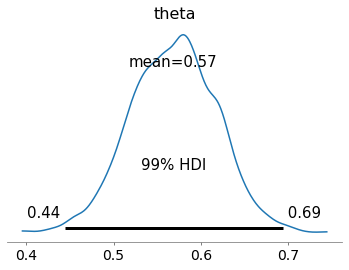

In [6]:
az.plot_posterior(trace, hdi_prob=0.99)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002582E114DD8>,
      dtype=object)

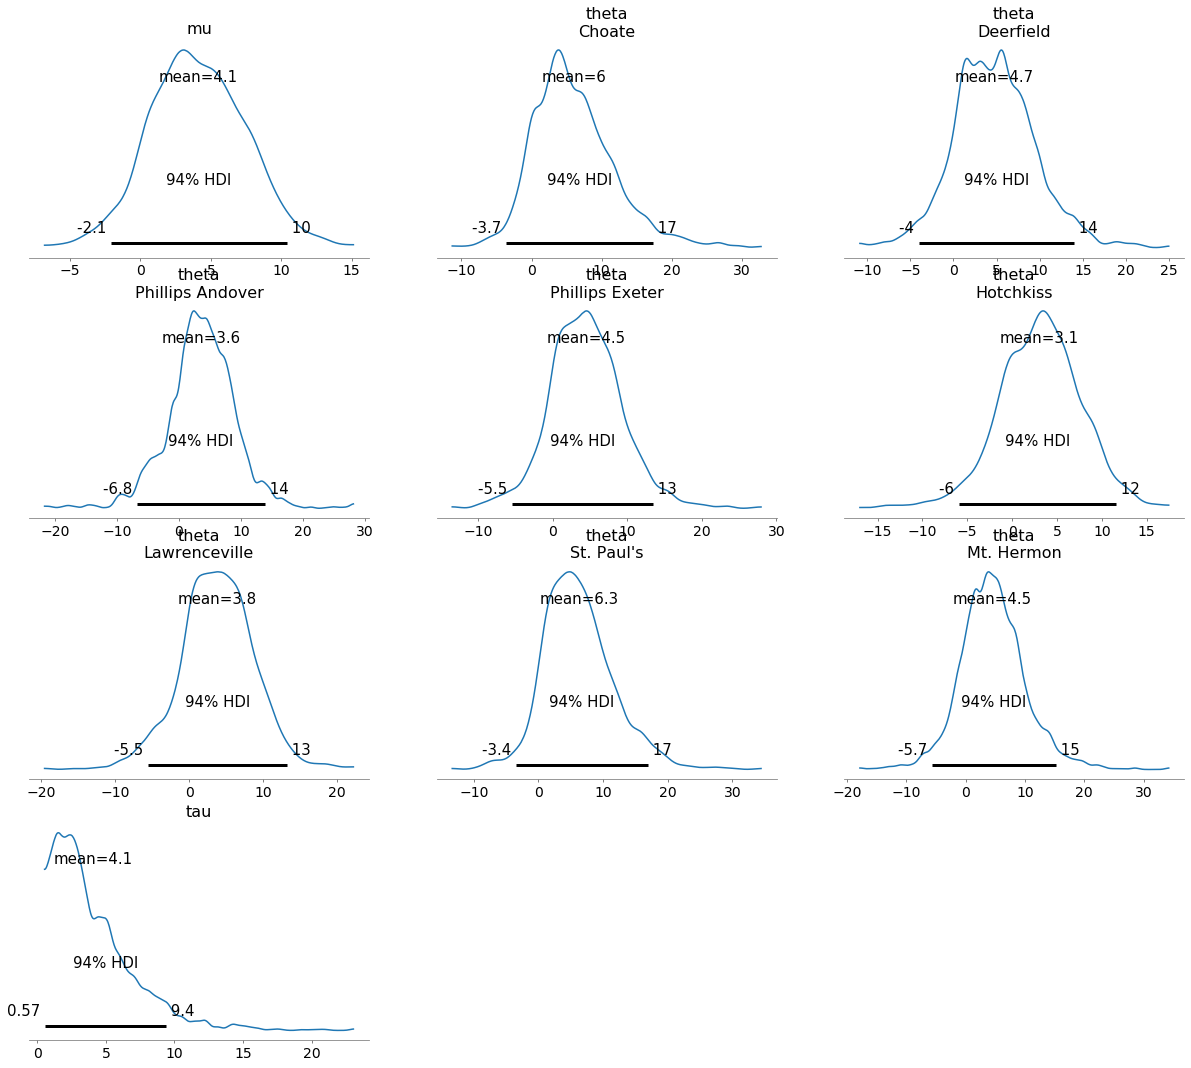

In [7]:
data = az.load_arviz_data('centered_eight')
az.plot_posterior(data)